In [1]:
#Adicionando as bibliotecas necessárias para as análises no dataset

import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.graph_objs as go
import plotly.offline as py
import os
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
import plotly.express as px


print(folium.__version__)

0.14.0


## PLOTS

In [2]:
# Definindo função para realiar a contagem de variáveis, nesse caso será necessário devido aos gráficos que serão usados.

sns.set(style="whitegrid")
sns.despine()

def plot_count(df, title, fig_size=(12,8), filename='plot', fontsize=8, ascending = False):
    p = (
        'Set2', 'tab20')
    color = sns.color_palette(np.random.choice(p), len(df))
    #color = sns.color_palette('Set2', len(ativos['Cargo']))
    bar   = df.value_counts().plot(kind='barh',
                    title=title,
                    fontsize=fontsize,
                    figsize=fig_size,
                    stacked=False,
                    width=1,
                    color='red',
                    
    )

    bar.figure.savefig('%s.png' % filename)

    plt.show()

<Figure size 432x288 with 0 Axes>

## Importando o banco de dados e tratando as informações

In [3]:
#Importando todo o banco de dados

df_17 = pd.read_excel('data17.xlsx')
df_18 = pd.read_excel('data18.xlsx')
df_19 = pd.read_excel('data19.xlsx')
df_20 = pd.read_excel('data20.xlsx')
df_21 = pd.read_excel('data21.xlsx')



In [4]:
#Puxando as informações dos DataFrames para verificar se podemos concaternar em um banco de dados só e conhecendo a base de dados 

df_17.info()
df_18.info()
df_19.info()
df_20.info()
df_21.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89567 entries, 0 to 89566
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      89567 non-null  int64         
 1   data_inversa            89567 non-null  datetime64[ns]
 2   dia_semana              89567 non-null  object        
 3   horario                 89567 non-null  object        
 4   uf                      89567 non-null  object        
 5   br                      89421 non-null  float64       
 6   km                      89421 non-null  float64       
 7   municipio               89567 non-null  object        
 8   causa_acidente          89567 non-null  object        
 9   tipo_acidente           89567 non-null  object        
 10  classificacao_acidente  89567 non-null  object        
 11  fase_dia                89567 non-null  object        
 12  sentido_via             89567 non-null  object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64539 entries, 0 to 64538
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      64539 non-null  int64         
 1   data_inversa            64539 non-null  datetime64[ns]
 2   dia_semana              64539 non-null  object        
 3   horario                 64539 non-null  object        
 4   uf                      64539 non-null  object        
 5   br                      64372 non-null  float64       
 6   km                      64372 non-null  float64       
 7   municipio               64539 non-null  object        
 8   causa_acidente          64539 non-null  object        
 9   tipo_acidente           64539 non-null  object        
 10  classificacao_acidente  64539 non-null  object        
 11  fase_dia                64539 non-null  object        
 12  sentido_via             64539 non-null  object

In [5]:
#Realizando a junção de todo o DatraFrame em uma base só para analisar as ocorrências de 2017 a 2022

df = pd.concat([df_17,df_18,df_19,df_20,df_21],ignore_index = True)
df.head(2)



id data_inversa dia_semana   horario  uf     br     km       municipio  \
0  17   2017-01-01    domingo  01:45:00  RS  116.0   34.9         VACARIA   
1  20   2017-01-01    domingo  01:00:00  PR  376.0  636.0  TIJUCAS DO SUL   

                causa_acidente              tipo_acidente  ... feridos_graves  \
0  Defeito Mecânico no Veículo           Colisão traseira  ...              0   
1      Velocidade Incompatível  Saída de leito carroçável  ...              0   

  ilesos ignorados feridos veiculos  latitude  longitude  regional  delegacia  \
0      2         0       4        2 -28.50712 -50.941176   SPRF-RS   DEL05-RS   
1      1         0       0        2 -25.75400 -49.126600   SPRF-PR   DEL01-PR   

               uop  
0   UOP03-DEL05-RS  
1  DEL7/1-UOP08/PR  

[2 rows x 30 columns]

In [64]:
print('O arquivo dataFrame dF tem '  + str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas')



O arquivo dataFrame dF tem 354570 linhas e 40 colunas


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354570 entries, 0 to 354569
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      354570 non-null  int64         
 1   data_inversa            354570 non-null  datetime64[ns]
 2   dia_semana              354570 non-null  object        
 3   horario                 354570 non-null  object        
 4   uf                      354570 non-null  object        
 5   br                      354570 non-null  object        
 6   km                      354570 non-null  float64       
 7   municipio               354570 non-null  object        
 8   causa_acidente          354570 non-null  object        
 9   tipo_acidente           354530 non-null  object        
 10  classificacao_acidente  354570 non-null  object        
 11  fase_dia                354570 non-null  object        
 12  sentido_via             354570

In [6]:
#Criando funções que iremos usar para criaçao de colunas que irão auxiliar na análise do DataFrame

#Função com valores binários de análise de ingestão de alcool

def alcool (x):
    return int('Ingestão de Álcool' in x) or int('Ingestão de álcool pelo condutor' in x)

#Função com valores binários da análise se estava chovendo

def chuva(x):
    return int('Chuva' in x) or int('Garoa/Chuvisco' in x)

#Função com valores binários da análise se era uma reta 

def reta(x):
    return int('Reta' in x)

#Função com valores binários da análise se era uma curva

def curva(x):
    return int('Curva' in x)

# Funções para separação de hora e minutos

def hora(x):    
    hora = x.split(":")[0]    
    return int(hora)

def minuto(x):
    minuto = x.split(":")[1]
    return int(minuto)

# Função para arrumar as coordenadas,caso estejam com vírgulas nas casas decimais

def arruma_coordenada(x):
    if isinstance(x, str):
        return(np.float64(x.replace(",", ".").strip()))
    else:
        return x

# Adicionando colunas no DataFrame
    
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month
df['dia'] = df['data_inversa'].dt.day
df['horario'] = df['horario'].astype(str)
df['latitude'] = df['latitude'].apply(lambda x: arruma_coordenada(x))
df['longitude'] = df['longitude'].apply(lambda x: arruma_coordenada(x))
df['br'] = df['br'].astype(str)
df['reta'] = df['tracado_via'].apply(lambda x: reta(x))
df['curva'] = df['tracado_via'].apply(lambda x: curva(x))
df['chovendo'] = df['condicao_metereologica'].apply(lambda x: chuva(x))
df['alcool'] = df['causa_acidente'].apply(lambda x: alcool(x))

# Definindo intervalos de 50 km.

df['Intervalos de km'] = pd.cut(df['km'], range(0, 600, 50), labels=range(50, 600, 50)).astype(float)
df[['km', 'Intervalos de km']].head(5)


# Separando a hora e minutos 

df['hora'] = df['horario'].apply(lambda x: hora(x))
df['minuto'] = df['horario'].apply(lambda x: minuto(x))

# verificando novo banco de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354570 entries, 0 to 354569
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      354570 non-null  int64         
 1   data_inversa            354570 non-null  datetime64[ns]
 2   dia_semana              354570 non-null  object        
 3   horario                 354570 non-null  object        
 4   uf                      354570 non-null  object        
 5   br                      354570 non-null  object        
 6   km                      353885 non-null  float64       
 7   municipio               354570 non-null  object        
 8   causa_acidente          354570 non-null  object        
 9   tipo_acidente           354530 non-null  object        
 10  classificacao_acidente  354570 non-null  object        
 11  fase_dia                354570 non-null  object        
 12  sentido_via             354570

In [7]:
#Substituindo onde não há valores preenchidos e substituindo por zero nas colunas da br e km 

df['br'] = df['br'].fillna(0.0)
df['km'] = df['km'].fillna(0)


### Defininindo filtro da análise de dados que  será do Estado do Espirito Santo na BR101.

In [8]:
#A analise de dados será do Estado do Espirito Santo na BR101.

df_br = df[df['br']=='101.0']

df_es = df_br[df_br['uf']=='ES']

df_es.head(5)


id data_inversa   dia_semana   horario  uf     br     km  \
17    217   2017-01-01      domingo  18:10:00  ES  101.0  301.6   
98    713   2017-01-03  terça-feira  10:25:00  ES  101.0   65.8   
141   902   2017-01-03  terça-feira  16:30:00  ES  101.0  435.1   
313  1699   2017-01-07       sábado  07:10:00  ES  101.0  129.8   
359  1947   2017-01-08      domingo  00:17:00  ES  101.0   93.4   

         municipio               causa_acidente              tipo_acidente  \
17           VIANA  Falta de Atenção à Condução           Colisão traseira   
98      SAO MATEUS  Falta de Atenção à Condução           Colisão traseira   
141  MIMOSO DO SUL  Falta de Atenção à Condução            Colisão lateral   
313       LINHARES  Falta de Atenção à Condução           Colisão traseira   
359        JAGUARE           Ingestão de Álcool  Atropelamento de Pedestre   

     ...   ano mes dia reta curva chovendo alcool  Intervalos de km  hora  \
17   ...  2017   1   1    1     0        0      0             350.0    18   
98   ...  2017   1   3    1     0        0      0             100.0    10   
141  ...  2017   1   3    1     0        0      0             450.0    16   
313  ...  2017   1   7    0     0        0      0             150.0     7   
359  ...  2017   1   8    1     0        0      1             100.0     0   

     minuto  
17       10  
98       25  
141      30  
313      10  
359      17  

[5 rows x 40 columns]

# Análise dos dados e exploração 

### Os numero de acidentes por ano x mês

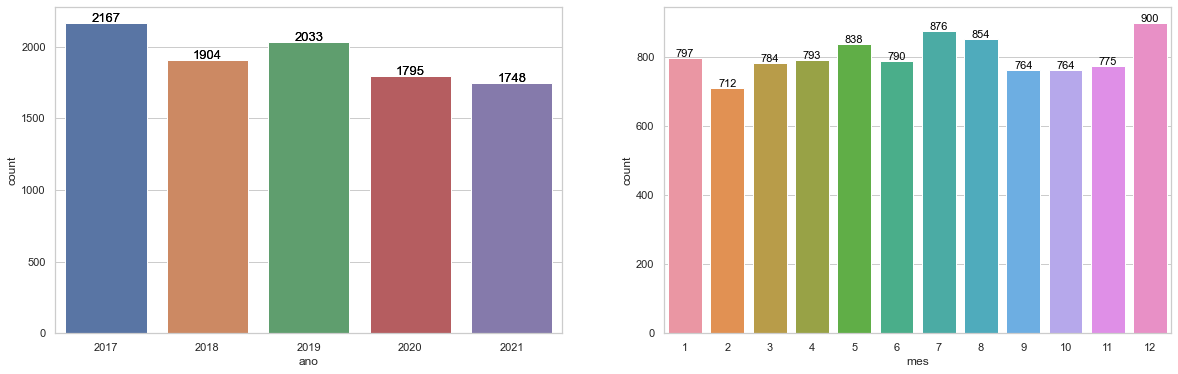

In [101]:
# Realizando a plotagem dos gráficos de ocorrências 

fig, ((axis1,axis2)) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,6)

sns.countplot(data=df_es, x='ano', ax=axis1)

# Plotando o rótulo de dados nos gráficos

plot = sns.countplot(data=df_es, x='ano', ax=axis1)


for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width()/2, i.get_height()),ha='center', va = 'baseline',
                 fontsize =13, color ='black', xytext = (0,1), textcoords='offset points')
    

plot2 = sns.countplot(data=df_es, x='mes', ax=axis2)
for i in plot2.patches:
    plot2.annotate(i.get_height(),(i.get_x() + i.get_width()/2, i.get_height()),ha='center', va = 'baseline',
                 fontsize =11, color ='black', xytext = (0,1), textcoords='offset points')


plt.show()
    

In [140]:
print('O Período de 2017 a 2022 registrou o total de '  + str(df_es['id'].count()) + ' acidentes')

O Período de 2017 a 2022 registrou o total de 9647 acidentes


O número de acidentes vem reduzindo ao longo dos últimos anos, o ano de 2017 foi um ano de recorde de acidentes de trânsito em todo o país, após um decréscimo em 2018, o numero voltou a aumentar em 2019, desde lá vem havendo uma queda nos números de incidentes.

Por senso comum e devido as festividades de fim de ano, se me perguntasse qual mês tem o maior número de acidentes, iria escolher  dezembro é o mês com o maior número de ocorrências, porém o alto índice de ocorrências no mês de julho e agosto me deixou surpreso. Irei realizar a investigação se isso ocorreu em um ano isolado, ou segue um padrão de ocorrências.

### Quais os munícipios que ocorreram o maior numero de acidentes ?

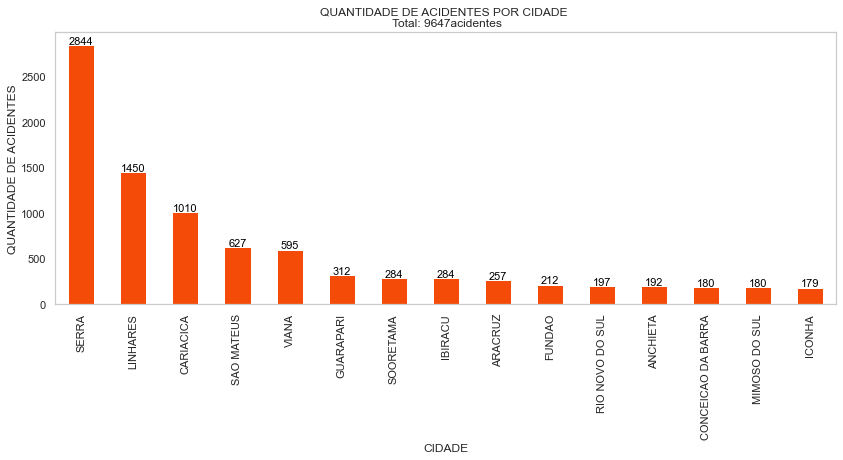

In [146]:
ax_estado =  df_es.groupby('municipio')['id'].count().sort_values(ascending=False).head(15).plot(kind='bar',
color= '#F54B09', figsize=(14,5), grid=False)

for i in ax_estado.patches:
    ax_estado.annotate(i.get_height(),(i.get_x() + i.get_width()/2, i.get_height()),ha='center', va = 'baseline',
                 fontsize =11, color ='black', xytext = (0,1), textcoords='offset points')
    
plt.title('QUANTIDADE DE ACIDENTES POR CIDADE \n Total: ' + str(df_es['id'].count()) + 'acidentes')
plt.xlabel('CIDADE')
plt.ylabel('QUANTIDADE DE ACIDENTES')
plt.show()

O municipio da Serra, Linhares e Cariacica, concentram mais de 50% dos acidentes do período analisado.

### Histograma 

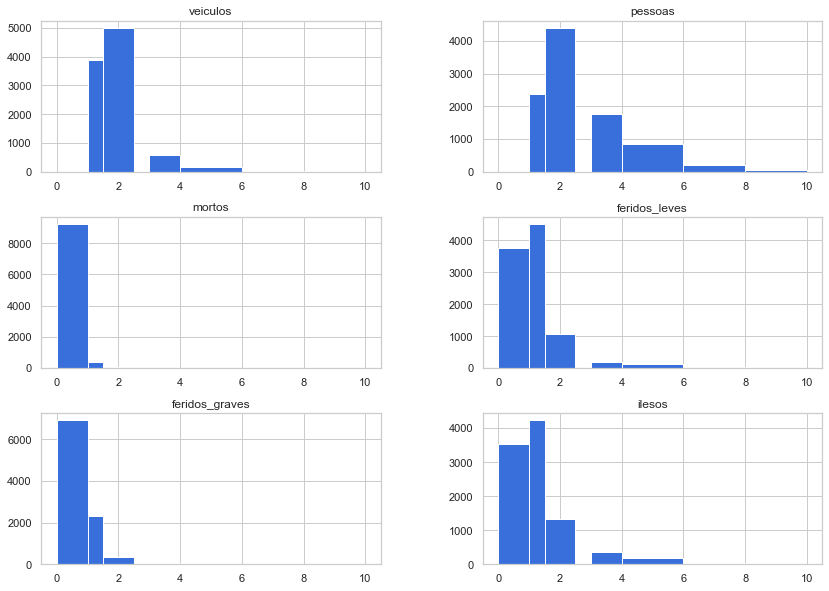

In [38]:
#criando histograma das colunas selecionadas

df_es.hist(column=['veiculos','pessoas','mortos','feridos_leves','feridos_graves','ilesos'], bins=[0,1,1.5,2.5,3,4,6,8,10], figsize=(14, 10),color='#386FDB')
plt.show()

O histograma permite-nos concluir que :

Veículos: Quase que na totalidade dos registros tem-se mais de um veículo.

Pessoas: A maioria dos acidentes tem mais de 2 pessoas envolvidas;

Mortos e Feridos Graves: A imensa maioria dos acidentes não tem mortos ou feridos graves

Feridos Leves e Ilesos: No entanto, a maioria tem feridos leves ou ilesos

###  Mapa de calor de ocorrências mensais 

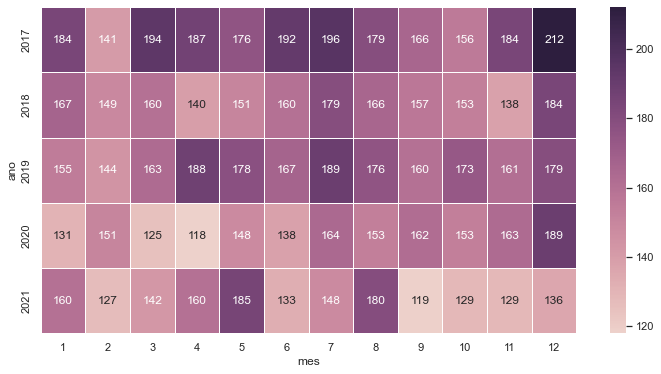

In [12]:
# Realizar o pivoteamento do banco de dados por ano, mes e dia

df_es_pivot =df_es.pivot_table(index='ano',columns='mes',values='id',aggfunc='count')
df_es_pivot_2 =df_es.pivot_table(index='mes',columns='dia',values='id',aggfunc='count')
df_es_pivot_3 =df_es.pivot_table(index='dia_semana',columns='hora',values='id',aggfunc='count')

#gerando um mapa de calor 

plt.figure (figsize=(12,6))
_ = sns.heatmap(df_es_pivot,annot=True,fmt='.0f',linewidth=.5,cmap=sns.cubehelix_palette(as_cmap=True))

###  Quais são os dias da semana que ocorreram o maior numero de acidentes ?

In [178]:
#Realizando um agrupamento dos dados por dia da semana e contando as 'IDs'

df_es.groupby('dia_semana')['id'].count().sort_values(ascending=False)

dia_semana
sábado           1551
sexta-feira      1527
domingo          1465
segunda-feira    1373
quinta-feira     1327
quarta-feira     1222
terça-feira      1182
Name: id, dtype: int64

O maior número de ocorrências aconteceram no sabádo, seguido de sexta-feira e domingo, ou seja aos finais de semana. Portanto se for viajar opte por voltar na segunda feira e ir em uma quinta feira, reduz substancialmente a probabilidade de ocorrer um acidente.


###  Como é o comportamento de acidentes em Dias da Semana x Horários :

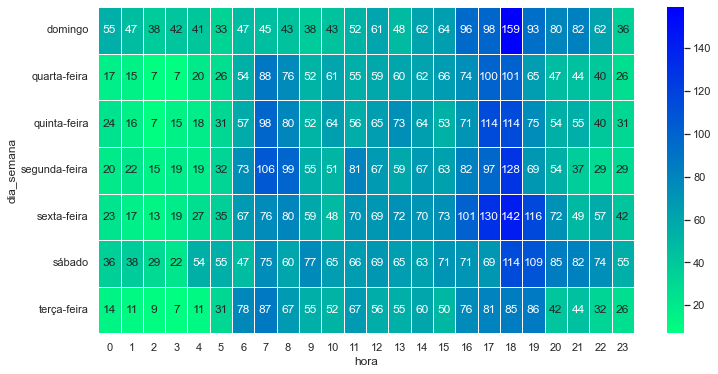

In [14]:
# Mapa de Calor de Ocorrencias ( Horário x Dia da Semana )

plt.figure (figsize=(12,6))
_ = sns.heatmap(df_es_pivot_3,annot=True,fmt='.0f',linewidth=.5,cmap='winter_r')


O horário das 18hrs as 19hrs em todos os dias é o período com o maior número de acidentes, isso muito possivelmente se deve ao fato de que durante a semana as pessoas voltam do trabalho/estudo em horário comercial que vai da parte da manhã até esse horário, no final de semana  na segunda feira o período de 7hrs as 8hrs tem o maior numero de ocorrências. O horário e dia com maior numero de ocorrências é no domingo entre as 18 horas e 19, provavelmente esse horário é que as pessoas estão retornando de viagens, de festas, e indo para igrejas. Pode-se perceber também que o período da tarde e noite das sextas é o período da semana com mais acidentes, provavelmente pela pressa das pessoas em chegarem em casa após o trabalho. A quantidade de acidentes durante a madrugada de sábado e domingo é mais elevada que nos outros dias, provavelmente se dar ao fato das pessoas estarem retornando de festas.

### Quais tipos de acidentes que mais ocorrem na BR101 no ES no período de 2017 a 2021 ?

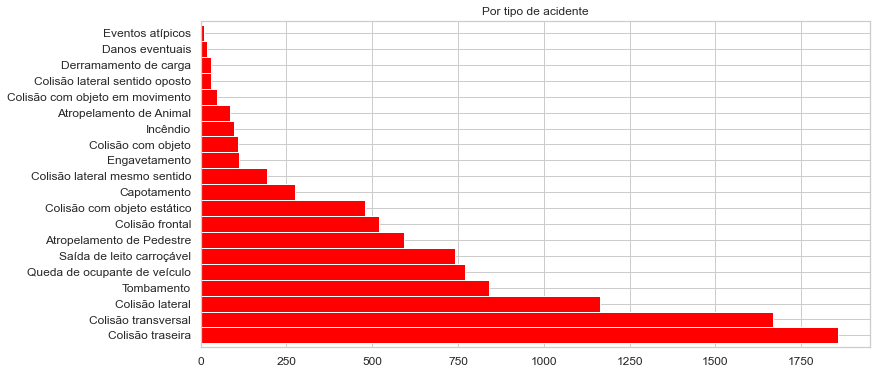

In [15]:
#contagem

plot_count(df_es['tipo_acidente'], 'Por tipo de acidente', fig_size=(12,6), filename='tipo_acidente', fontsize=12)

 As colisões são as maiores causas de acidentes, não conhecia o conceito de colisão transversal, segundo o código de trânsito, "colisão transversal: Quando há impacto entre dois veículos que se cruzam ortogonal ou obliquamente (frente de um e lateral do outro)", ou seja, são colisões que acontecem principalmente, ao realizar ultrapassagens.

### Quais tipos de acidentes com maior número de óbitos 

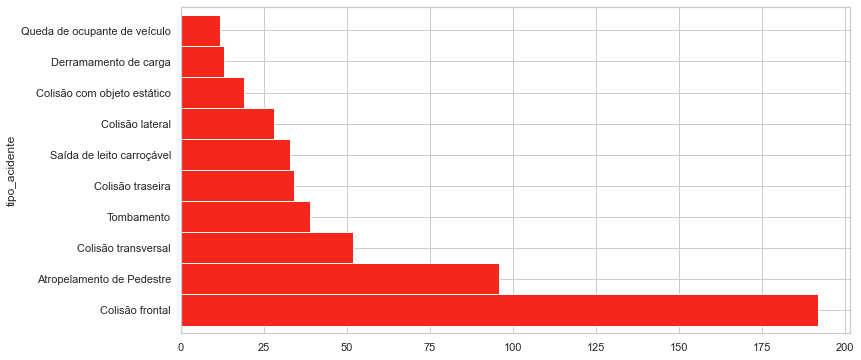

In [147]:
#Agrupando por tipo de acidente e somando o numero de mortos 

acidente_mortos = df_es.groupby('tipo_acidente')['mortos'].sum().sort_values(ascending=False).head(10).plot(kind='barh', 
color= '#F5271B', figsize=(12,6), width=1, grid=True)



Apesar de não estar entre as maiores ocorrências, a colisão frontal foi o tipo de acidente com maior número de mortos no período analisado na BR 101 no ES, seguido de atropelamento e colisão transversal, vamos plotar um quadro para verificar a letalidade dos acidentes 

### Grau de letalidade dos tipos de acidentes 

In [17]:
# Soma dos mortos, feridos e ilesos por tipo de acidente.
tipo_acidentes = df_es.groupby('tipo_acidente')[['mortos', 'feridos_leves', 'feridos_graves', 'ilesos']].sum()

# Calculando o percentual.
tipo_acidentes_pct = tipo_acidentes.div(tipo_acidentes.sum(axis=1), axis=0)

# Ordenando.
x = round(tipo_acidentes_pct.sort_values(by='mortos', ascending=False),3)*100

x.head(10)

mortos  feridos_leves  feridos_graves  ilesos
tipo_acidente                                                              
Derramamento de carga           21.7           15.0             6.7    56.7
Colisão frontal                 11.3           31.2            24.1    33.4
Atropelamento de Pedestre        8.1           27.2            27.1    37.6
Tombamento                       3.3           62.5            20.0    14.2
Colisão com objeto estático      2.9           41.7            19.1    36.3
Saída de leito carroçável        2.8           57.2            17.1    23.0
Capotamento                      2.0           52.2            10.9    34.9
Colisão com objeto               1.9           43.9            27.1    27.1
Colisão transversal              1.3           34.9            18.1    45.7
Queda de ocupante de veículo     1.2           66.1            22.8     9.9

Derramamento de carga tem quase o dobro de letalidade do segundo tipo de acidente, esses são acidentes onde as cargas de cargas abertas acabam caindo nas rodovias, isso serve de alerta para a Polícia Federal realizar uma maior inspeção da amarração da carga e com peso também, pois acidentes desse tipo, tem grande probabilidade de morte. Colisão Frontal que foi a causa com o maior número de óbitos vem em segundo lugar no percentual de mortos e feridos graves, assim como atropelamento de pedrestres.

### Os acidentes acontecem mais nas retas ou nas curvas?

In [54]:
print("Reta: ", len(df_es[df_es.reta == 1]))
print("Curva: ", len(df_es[df_es.curva == 1]))


fig = go.Figure(data=[go.Pie(labels=['Reta', 'Curva'], 
                 values= [len(df_es[df_es.reta == 1]), 
                 len(df_es[df_es.curva == 1])],hole=.3)])
fig.show()

Reta:  6022
Curva:  1386


Esse gráfico me recordou um estudo que li certa vez na super interessante, que na Europa as novas estradas estão sendo construídas cada vez mais com curvas, pois o percentual de acidentes é menor, provavelmente isso se deve ao fato de que os condutores sempre aceleram mais ao dirigir ao longo das retas. Ao chegar nas curvas, a velocidade do veículo já está bastante reduzida.

### Quais são as causas mais comuns dos acidentes ?

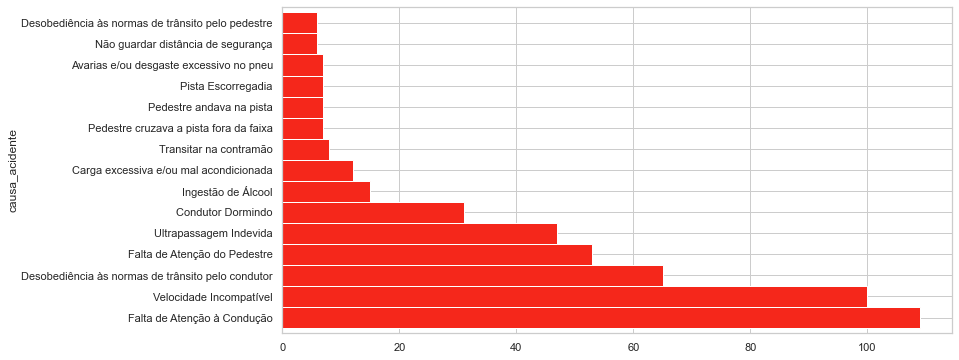

In [149]:
#Agrupando causa de acidente 

acidente_mortos = df_es.groupby('causa_acidente')['mortos'].sum().sort_values(ascending=False).head(15).plot(kind='barh', 
color= '#F5271B', figsize=(12,6), width=1, grid=True)

As causas de acidente são diversas, a falta de atenção a condução é disparada a maior causa, dados coletados em situações reais raramente são homogêneos, no geral, são ruidosos e possuem inconsistências, por exemplo, "Não guardar distância de segurança" e "Condutor deixou de manter distância do veículo da frente" são duas causas que poderiam estar agrupadas em um só, então para melhor análise e investigação das causas uma padronização desses dados seria importante. 

Através desses dados pode se realizar vários tipos de investigações, por exemplo, em quais trechos ocorrem mais acidentes de velocidade incompatível ?, de posse desses dados, há informações para instalações de radares em diferentes trechos.

### Acidentes por excesso de velocidade e ingestão de álcool

Para quem circula na BR101 tem cada vez mais notado o aumento do numero de radares com o decorrer dos anos, isso é motivo até de reclamação por alguns condutores, vamos verificar se o numero de acidentes decorrentes ao excesso de velocidade vem aumentando ou diminuindo, e vamos analisar os acidentes com motoristas dirigindo alcoolizados.

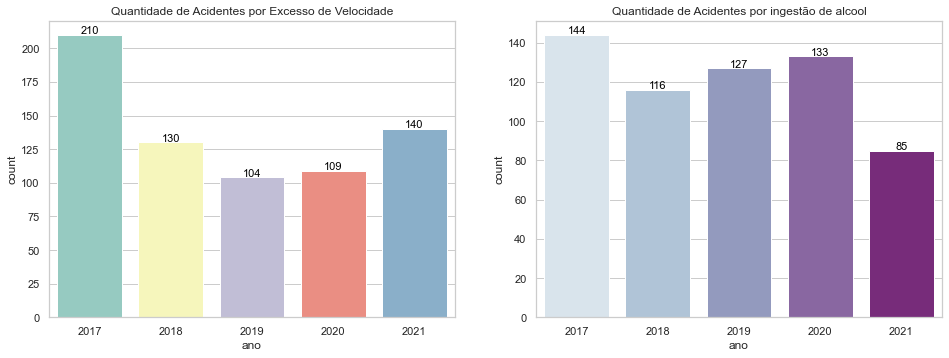

In [20]:
# Realizando a plotagem dos gráficos de ocorrências 

fig = plt.figure(figsize=(16,12))


ax = fig.add_subplot(2, 2, 1)
plot2 = sns.countplot(data=df_es[df_es.causa_acidente.str.contains("Velocidade Incompatível")], x='ano', palette="Set3", ax=ax)
for i in plot2.patches:
    plot2.annotate(i.get_height(),(i.get_x() + i.get_width()/2, i.get_height()),ha='center', va = 'baseline',
                 fontsize =11, color ='black', xytext = (0,1), textcoords='offset points')

    ax.set_title('Quantidade de Acidentes por Excesso de Velocidade')

ax = fig.add_subplot(2, 2, 2)
plot3 = sns.countplot(data=df_es[df_es.causa_acidente.str.contains('Ingestão de Álcool|Ingestão de álcool pelo condutor')], x='ano', palette="BuPu", ax=ax)
for i in plot3.patches:
    plot3.annotate(i.get_height(),(i.get_x() + i.get_width()/2, i.get_height()),ha='center', va = 'baseline',
                 fontsize =11, color ='black', xytext = (0,1), textcoords='offset points')
ax.set_title('Quantidade de Acidentes por ingestão de alcool')

plt.show()

### Acidentes com vítimas fatais entre 2017  e 2021

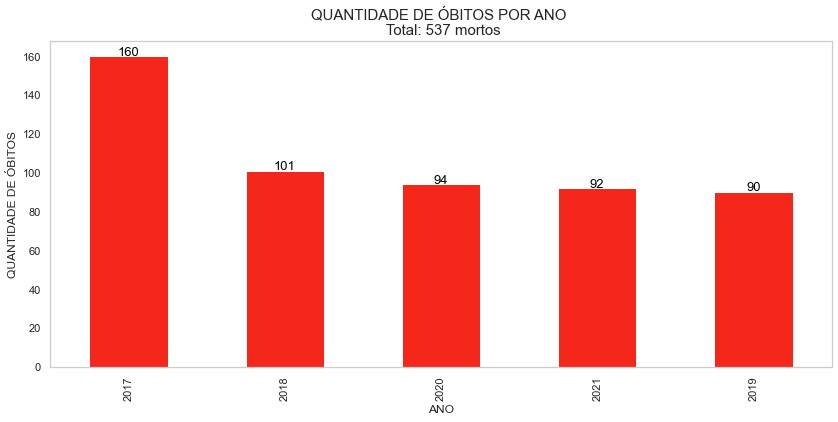

In [172]:
# mortos por ano

mortos_ano =  df_es.groupby('ano')['mortos'].sum().sort_values(ascending=False).head(15).plot(kind='bar',
color= '#F5271B', figsize=(14,6), grid=False)

for i in mortos_ano.patches:
    mortos_ano.annotate(i.get_height(),(i.get_x() + i.get_width()/2, i.get_height()),ha='center', va = 'baseline',
                 fontsize =13, color ='black', xytext = (0,1), textcoords='offset points')
     
plt.title('QUANTIDADE DE ÓBITOS POR ANO \n Total: ' + str(df_es['mortos'].sum()) + ' mortos',fontsize =15)
plt.xlabel('ANO',fontsize = 12)
plt.ylabel('QUANTIDADE DE ÓBITOS')
plt.show()

O ano de 2017 foi um ano extremamente trágico para a BR101 no estado do Espirito Santo, o total média de óbitos veio reduzindo até 2019 quando se estabilizou, iremos investigar a média de óbitos por acidente ao longo dos anos. 

### Média de vitimas fatais  por acidente 

Text(0.5, 1.0, 'Mortos por acidente x Mês')

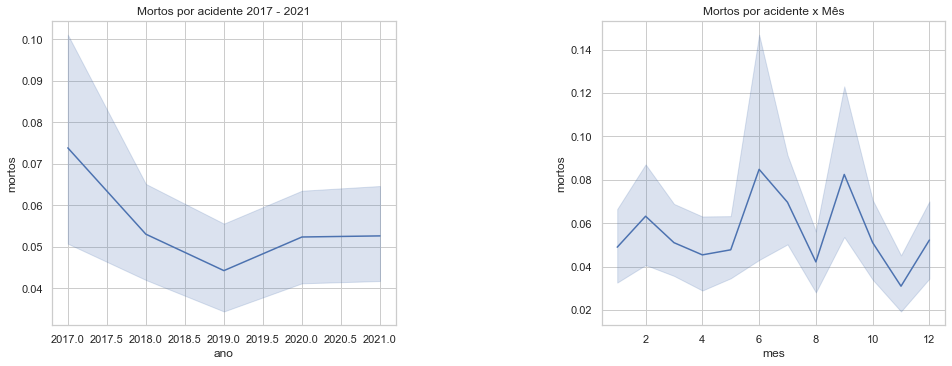

In [50]:
#Plotar a quantidade de mortos por ocorrência entre 2017 e 2021

fig = plt.figure(figsize=(16,14))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
ax = fig.add_subplot(2, 2, 1)
sns.lineplot(x="ano", y="mortos", data=df_es, ax=ax)
ax.set_title('Mortos por acidente 2017 - 2021')

#Plotar a quantidade de mortos por mês

ax = fig.add_subplot(2, 2, 2)
sns.lineplot(x="mes", y="mortos", data=df_es, ax=ax, markers=True, dashes=False)
ax.set_title('Mortos por acidente x Mês')

A quantidade de mortos baixou desde 2017, porém se analisarmos vem aumentando desde o ano de 2019, Em 2017 ocorreu um óbito a cada 14 ocorrências, enquanto em 2021 essa média aumentou para 19,2. O mês de junho é o mais com maior quantidade de óbitos por ocorrência, logo após vem setembro, o mês de dezembro apesar de ser o mês com maior numero de ocorrências, se torna o mês com a menor quantidade de óbitos.



### Números de óbitos pro trecho de km

In [25]:
#Caracteristicas dos acidentes por km


df_es['km'].describe()

count    9647.000000
mean      227.669877
std       104.586649
min         0.000000
25%       146.700000
50%       263.100000
75%       292.900000
max       461.000000
Name: km, dtype: float64

Text(0.5, 1.0, '\nNúmero acumulado de mortes na BR101 no ES por sentido da via')

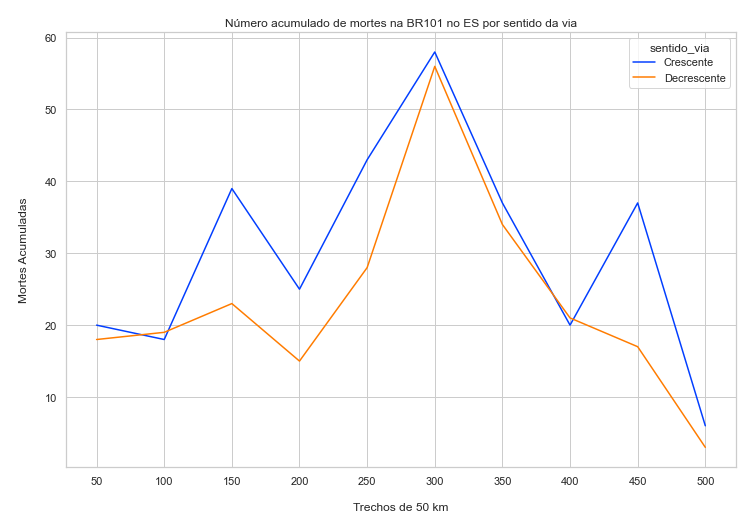

In [26]:
# Somando os mortos por BR em cada trecho de 50km.
mortos_br_km = df_es.groupby(['br', 'Intervalos de km','sentido_via'])['mortos'].sum().reset_index().dropna()

# Criando filtros para Crescente e Decrescente.
sentido_via = (mortos_br_km['sentido_via'] == 'Crescente') | (mortos_br_km['sentido_via'] == 'Decrescente')

top_brs = mortos_br_km[sentido_via].groupby(['br', 'Intervalos de km','sentido_via'])['mortos'].sum().reset_index()

# Ordenando e reindexando.
top_brs.sort_values(by=['br', 'Intervalos de km'], inplace=True)
top_brs.index = range(len(top_brs))

# Adicionando uma coluna de mortes acumuladas para todas as BRs.
top_brs['Mortes Acumuladas'] = top_brs.groupby(['br'])['mortos'].cumsum()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

linhas = sns.lineplot(ax=ax, x='Intervalos de km', y='mortos', hue='sentido_via', data=top_brs, palette='bright')
linhas.set_xlabel("\nTrechos de 50 km\n")
linhas.set_xticks(top_brs['Intervalos de km'].unique())
linhas.set_ylabel("\nMortes Acumuladas\n")
linhas.set_title("\nNúmero acumulado de mortes na BR101 no ES por sentido da via")

As BRs no Brasil são classificadas de acordo com os sentidos das vias entre crescente e decrescente.Esse gráfico mostra o acumulado de mortes de acordo com os trechos, pode-se concluir que no Espirito Santo o trecho entre 250km a 300m, O sentido crescente tem maior acumulo de acidentes que o descrescentetanto no sentindo crescente quanto no decrescente existe o maior numero de ocorrências, isso sinaliza para instalação de pontos de apoios, investigação dos acidentes, manutenção nas vias e etc. 

### Mapa de Calor

In [53]:
#Criacão de dataset separando por latitude e longitude

df_geo = df_es[['latitude','longitude']]

df_geo.dropna()

#Criando mapa

baseMap = folium.Map(widht ="100%",
                    height = "100%",
                    location = [-20.315500,-40.312800],
                    zoom_start=4)

#Adicionando mapa de calor 

HeatMap(df_geo).add_to(baseMap)

for i in range(0, len(df_geo)):
    folium.Circle(
        location = [ df_geo.iloc[i]['latitude'], df_geo.iloc[i]['longitude']],
        color = '#1FFF3D',
        fill = '00A1B3',
    ).add_to(baseMap)

baseMap.save('heatmap-cidades.html')


In [51]:
baseMap